# Real OR Fake News Analysis

##### importing Basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data Collection

We are extracting data from two csv files that is One for Fake news and one for Real news

In [2]:
#Loading the both data set
#Fake_news
fake = pd.read_csv('Fake (1).csv', encoding = 'latin-1', on_bad_lines='skip')
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [4]:
#True_news
true = pd.read_csv('True.csv', encoding = 'latin-1', on_bad_lines='skip')
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true.tail()

,title,text,subject,date
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21415,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


# EDA

In [6]:
#checking shape of the data
fake.shape

(23481, 4)

In [7]:
true.shape

(21416, 4)

In [8]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
#converting fake datatype of date column
fake['date']=pd.to_datetime(fake['date'],errors='coerce')
#converting true datatype of date column
true['date']=pd.to_datetime(true['date'],errors='coerce')

In [11]:
print(fake.date.dtype)
print(true.date.dtype)

datetime64[ns]
datetime64[ns]


In [12]:
fake.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
dtype: object

In [13]:
true.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
dtype: object

In [14]:
#Duplicate rows for fake and true news
fake.duplicated().sum()

3

In [15]:
true.duplicated().sum()

206

In [16]:
fake= fake.drop_duplicates()
true= true.drop_duplicates()

In [17]:
print(fake.duplicated().sum())
print(true.duplicated().sum())

0
0


In [18]:
#Missing values for fake and true news
fake.isnull().sum()

title       0
text        0
subject     0
date       10
dtype: int64

In [19]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [20]:
#creating new dataframe with all null values of date
nan_date= fake[fake['date'].isnull()]
print(nan_date.shape)
nan_date.head()

(10, 4)


,title,text,subject,date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT


In [21]:
nan_date['subject'].value_counts()

politics           5
left-news          3
Government News    2
Name: subject, dtype: int64

In [22]:
# checking if there are any blank text in text column
fake[fake['text']==' '].head(20)

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,2017-05-10
11041,Joe Scarborough BERATES Mika Brzezinski Over ...,,politics,2017-04-26
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,2017-04-06
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,2017-04-02
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,2017-04-01
11241,BOOM! SEAN SPICER: Trump Sold Hotels In Russi...,,politics,2017-03-31
11247,MICHAEL FLYNNS LAWYER Releases Statement Scor...,,politics,2017-03-30
11249,ROB SCHNEIDER Nails The Russia Conspiracy Theo...,,politics,2017-03-30
11267,TREY GOWDY ON SPYING ON AMERICAN CITIZENS&Like...,,politics,2017-03-28
11268,SEAN SPICER CALLS OUT Race Baiting Journalist:...,,politics,2017-03-28


In [23]:
blank_text=fake[fake['text']==' ']

In [24]:
blank_text['subject'].value_counts()

politics           406
left-news          149
Government News     71
Name: subject, dtype: int64

In [25]:
# checking if there are any blank text in text column
true[true['text']==' ']

,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,2016-06-16


In [27]:
print(fake.shape)
true.shape

(22852, 4)


(21209, 4)

In [28]:
#combine

true['label']='fake'
fake['label']='true'

data = pd.concat([true, fake], axis=0)
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,fake


## Data Visualization

In [29]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn import preprocessing
import re
from wordcloud import WordCloud
import pandas
import string
from nltk.corpus import stopwords
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='subject', ylabel='count'>

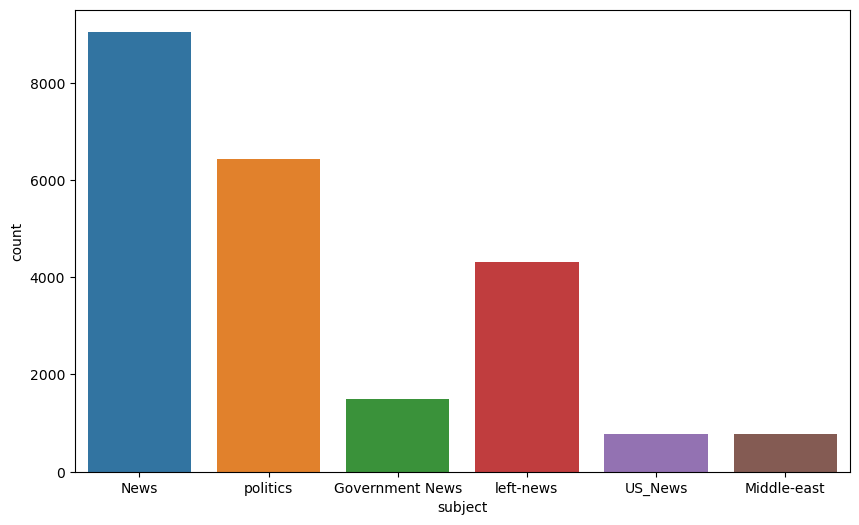

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=fake)

<AxesSubplot:xlabel='subject', ylabel='count'>

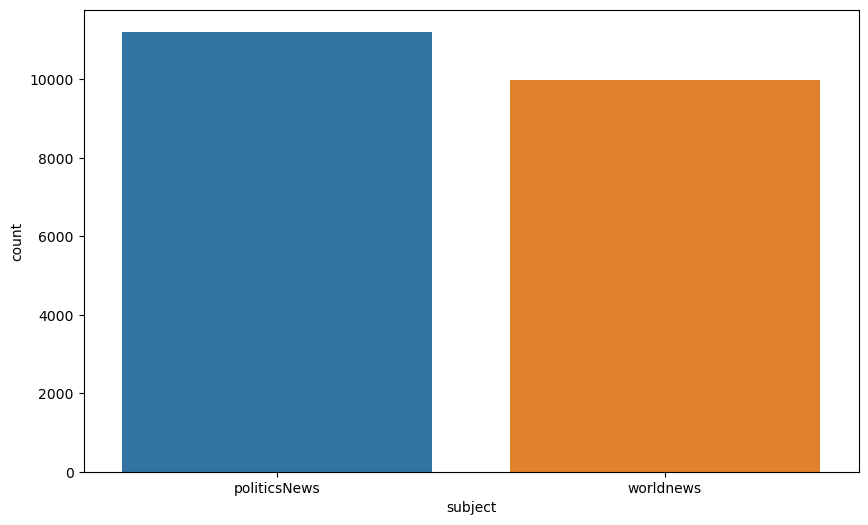

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject', data=true)

In [ ]:
#Distribution of label

In [32]:
data["label"].value_counts()

true    22852
fake    21209
Name: label, dtype: int64

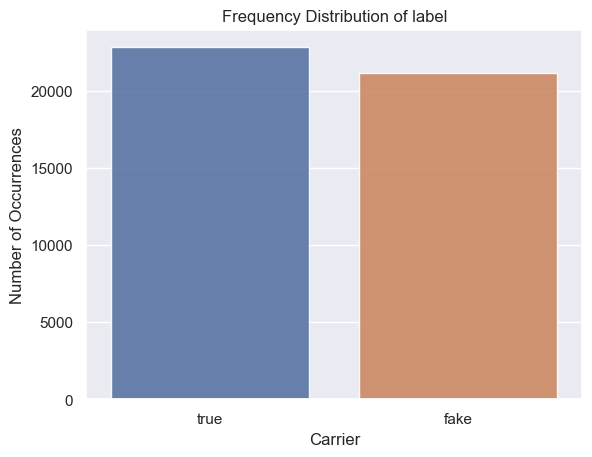

In [33]:
import seaborn as sns

#Frequency distribution of label
%matplotlib inline
carrier_count = data["label"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=carrier_count.index, y=carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

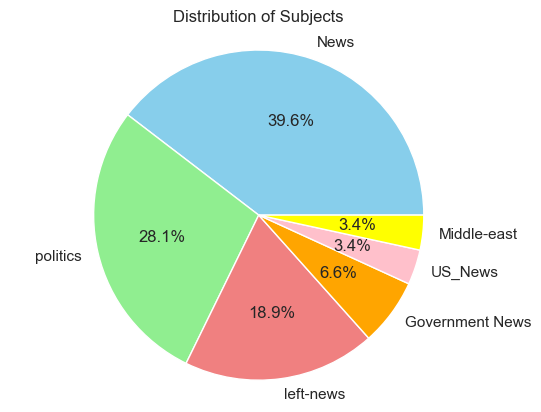

In [34]:
# analysing subject column of fake news

# Create a pie chart
# Define colors for the pie slices
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink','yellow']
subject_count = fake['subject'].value_counts()
subject_labels = subject_count.index.tolist()

# Create the pie chart with percentage labels
plt.pie(subject_count, labels=subject_labels, colors=colors, autopct='%1.1f%%')
# Set aspect ratio to make the pie chart circular
plt.axis('equal')
# Set a title for the pie chart
plt.title('Distribution of Subjects')
# Display the chart
plt.show()

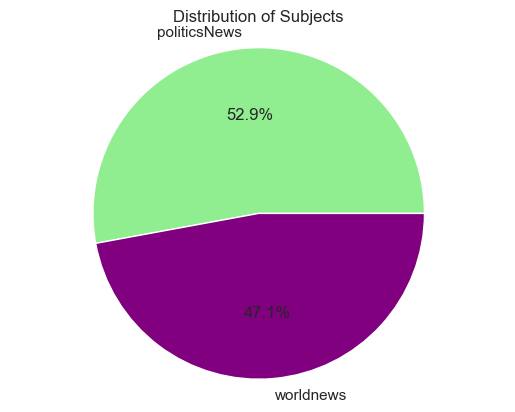

In [35]:
# analysing subject column of real news

# Create a pie chart
# Define colors for the pie slices
colors = ['lightgreen', 'purple']
subject_count = true['subject'].value_counts()
subject_labels = subject_count.index.tolist()

# Create the pie chart with percentage labels
plt.pie(subject_count, labels=subject_labels, colors=colors, autopct='%1.1f%%')
# Set aspect ratio to make the pie chart circular
plt.axis('equal')
# Set a title for the pie chart
plt.title('Distribution of Subjects')
# Display the chart
plt.show()

In [ ]:
#Toeknization

In [36]:
tokenizer = RegexpTokenizer(r'\w+')
data["text"] = data["text"].apply(tokenizer.tokenize)

In [37]:
data["text"].head()

0    [WASHINGTON, Reuters, The, head, of, a, conser...
1    [WASHINGTON, Reuters, Transgender, people, wil...
2    [WASHINGTON, Reuters, The, special, counsel, i...
3    [WASHINGTON, Reuters, Trump, campaign, adviser...
4    [SEATTLE, WASHINGTON, Reuters, President, Dona...
Name: text, dtype: object

In [ ]:
#STOP words of english

In [38]:
!pip install nltk

In [39]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\namu1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
#clear stop words
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
data["text"]=data["text"].apply(lambda x: [item for item in x if item not in stopwords_list])
data["text"].head()

0    [WASHINGTON, Reuters, The, head, conservative,...
1    [WASHINGTON, Reuters, Transgender, people, all...
2    [WASHINGTON, Reuters, The, special, counsel, i...
3    [WASHINGTON, Reuters, Trump, campaign, adviser...
4    [SEATTLE, WASHINGTON, Reuters, President, Dona...
Name: text, dtype: object

##### Stop words removel from text column

In [41]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: [item for item in x if item not in stop])
print(data.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  [WASHINGTON, Reuters, The, head, conservative,...  politicsNews 2017-12-31   
1  [WASHINGTON, Reuters, Transgender, people, all...  politicsNews 2017-12-29   
2  [WASHINGTON, Reuters, The, special, counsel, i...  politicsNews 2017-12-31   
3  [WASHINGTON, Reuters, Trump, campaign, adviser...  politicsNews 2017-12-30   
4  [SEATTLE, WASHINGTON, Reuters, President, Dona...  politicsNews 2017-12-29   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake  


In [ ]:
#Joining text column into a string for vectorization

In [42]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: sequence item 0: expected str instance, list found

In [ ]:
#Word Cloud

In [ ]:
#Seperate word cloud for True and Fake.

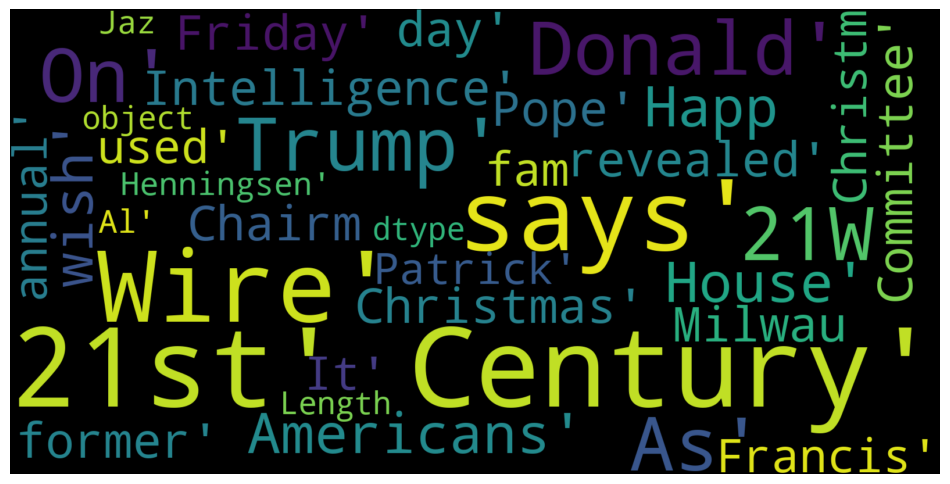

In [43]:
#True
data1=data[data['label']=='true']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

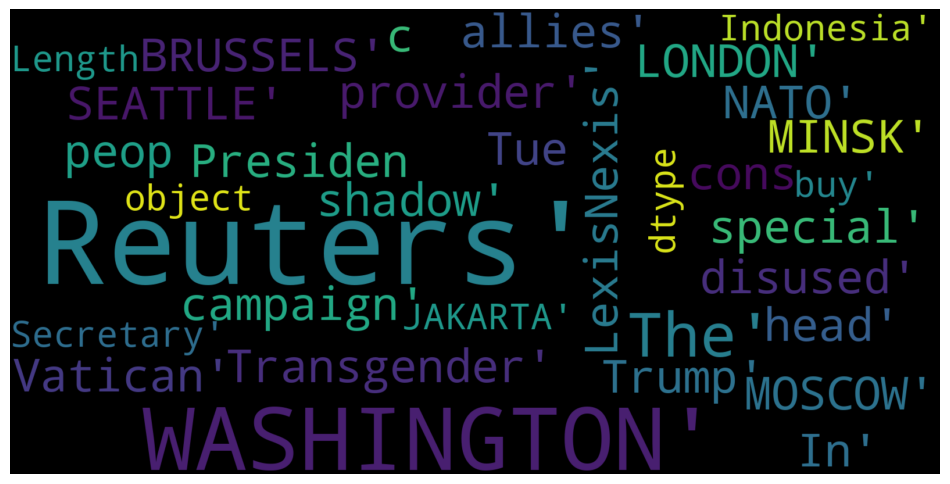

In [44]:
#Fake
data1=data[data['label']=='fake']
neg =data1['text']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pandas.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
import pandas as pd
clean_data = data

In [ ]:
#Lemmatization of text column

In [46]:
!pip install nltk
!python -m nltk.downloader wordnet

C:\Users\namu1\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\namu1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(data.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  [WASHINGTON, Reuters, The, head, conservative,...  politicsNews 2017-12-31   
1  [WASHINGTON, Reuters, Transgender, people, all...  politicsNews 2017-12-29   
2  [WASHINGTON, Reuters, The, special, counsel, i...  politicsNews 2017-12-31   
3  [WASHINGTON, Reuters, Trump, campaign, adviser...  politicsNews 2017-12-30   
4  [SEATTLE, WASHINGTON, Reuters, President, Dona...  politicsNews 2017-12-29   

  label  
0  fake  
1  fake  
2  fake  
3  fake  
4  fake  


In [ ]:
#Feature Extraction From The Texts Text

In [ ]:
#Using TFIDF for vectorization

In [48]:
#Unigram features

from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

In [49]:
#preparing features for traning and testing
unigramdataGet= word_vectorizer.fit_transform(data['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out() # Changed get_feature_names to get_feature_names_out
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,000,1,10,100,11,12,13,14,15,16,...,worker,working,world,wrong,wrote,year,yes,york,young,youtube
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [50]:
#drop text
#feature selection from unigram
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


selector = SelectKBest(chi2, k=35)
selector.fit(unigramdata, data['label'])

unigramdata = selector.transform(unigramdata)
print(unigramdata.shape)

(44061, 35)


In [ ]:
#Train and Test

In [52]:
X=unigramdata
y=data['label']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
#Model building

In [54]:
#SVM

In [55]:
from sklearn.svm import LinearSVC

svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, max_iter=500)

In [56]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.95


In [57]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.95      0.94      0.95      6383
        true       0.94      0.96      0.95      6836

    accuracy                           0.95     13219
   macro avg       0.95      0.95      0.95     13219
weighted avg       0.95      0.95      0.95     13219





In [58]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [59]:
conda install -c conda-forge mlxtend


Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\namu1\anaconda3

  added / updated specs:
    - mlxtend


The following NEW packages will be INSTALLED:

  colorama           conda-forge/noarch::colorama-0.4.6-pyhd8ed1ab_0 
  joblib             conda-forge/noarch::joblib-1.4.2-pyhd8ed1ab_0 
  libblas            conda-forge/win-64::libblas-3.9.0-1_h8933c1f_netlib 
  libcblas           conda-forge/win-64::libcblas-3.9.0-5_hd5c7e75_netlib 
  liblapack          conda-forge/win-64::liblapack-3.9.0-5_hd5c7e75_netlib 
  m2w64-gcc-libgfor~ conda-forge/win-64::m2w64-gcc-libgfortran-5.3.0-6 
  m2w64-gcc-libs     conda-forge/win-64::m2w64-gcc-libs-5.3.0-7 
  m2w64-gcc-libs-co~ conda-forge/win-64::m2w64-gcc-libs-core-5.3.0-7 
  m2w64-gmp          conda-forge/win-64::m2w64-gmp-6.1.0-2 
  mlxtend            conda-forge/noarch::mlxtend-0.23.1-pyhd8ed1ab_0 
  pygments           conda-forge/n


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda-anon-usage==0.3.0=py39h8ddfbff_0
  - defaults/win-64::anaconda-client==1.11.0=py39haa95532_0
  - defaults/win-64::anaconda==custom=py39_2
  - defaults/win-64::anaconda-navigator==2.4.3=py39haa95532_0
  - defaults/win-64::anaconda-project==0.11.1=py39haa95532_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/win-64::astroid==2.11.7=py39haa95532_0
  - defaults/win-64::astropy==5.1=py39h080aedc_0
  - defaults/win-64::babel==2.11.0=py39haa95532_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_1
  - defaults/win-64::black==22.6.0=py39haa95532_0
  - defaults/win-64::bokeh==2.4.3=py39haa95532_0
  - defaults/win-64::bottleneck==1.3.5=py39h080aedc_0
  - defaults/win-64::click==8.0.4=py39haa95532_0
  - defaults/win-64::colorcet==3.0.0=py39haa95532_0
  - defaults/win-64::con



confusion matrix


[[5981  402]
 [ 287 6549]]




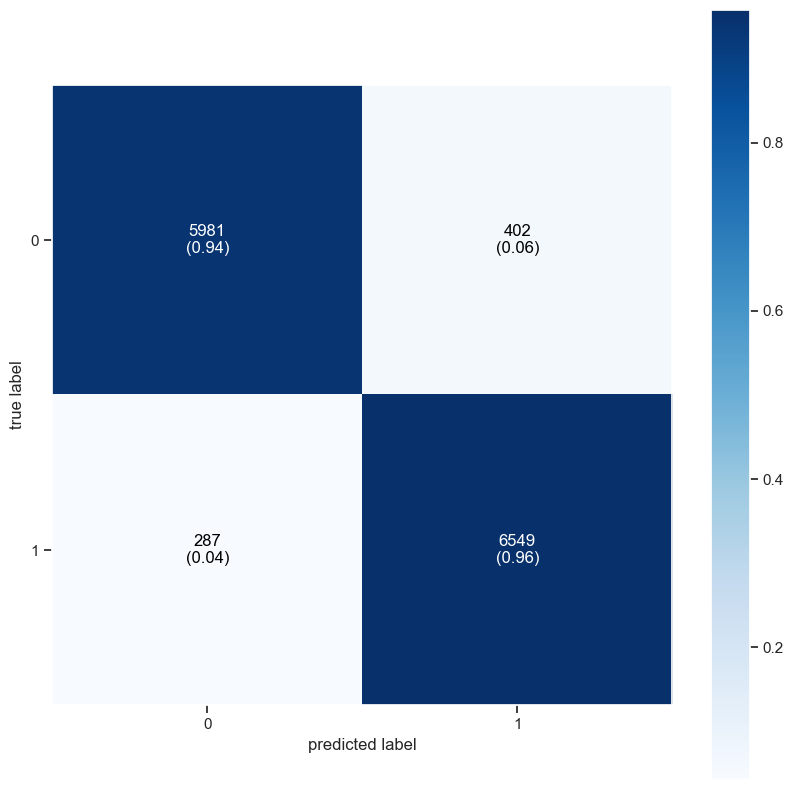

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Naive Bayes Algorithm

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(var_smoothing=1e-08)

In [62]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.84


In [63]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.76      0.99      0.85      6383
        true       0.98      0.70      0.82      6836

    accuracy                           0.84     13219
   macro avg       0.87      0.84      0.84     13219
weighted avg       0.87      0.84      0.84     13219







confusion matrix


[[6289   94]
 [2040 4796]]




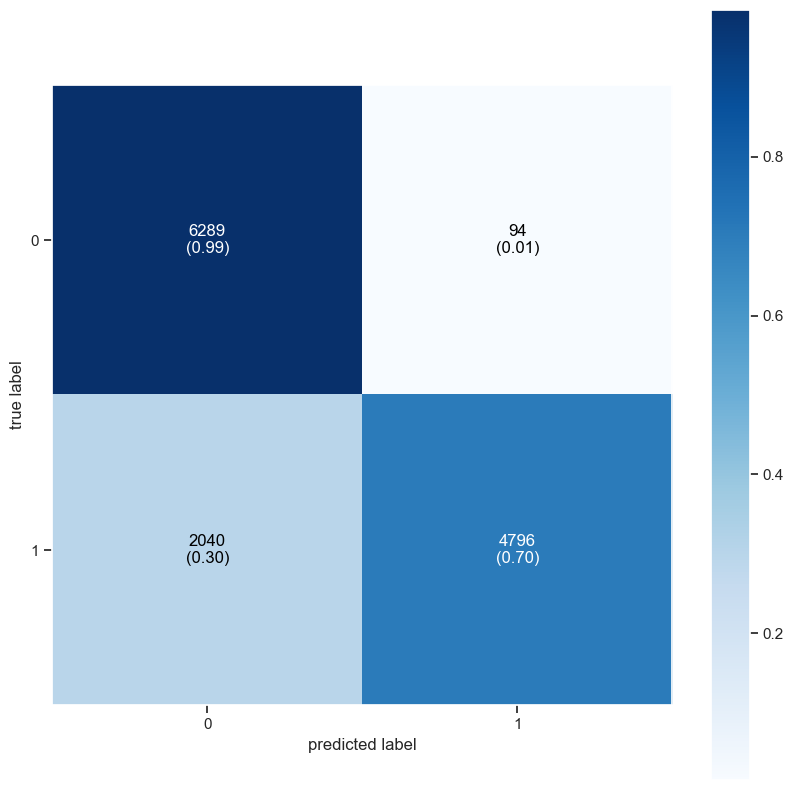

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Logistic Regression Algorithm

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2)

In [66]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.95


In [67]:
from sklearn.metrics import classification_report, confusion_matrix                    


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.95      0.94      0.95      6383
        true       0.94      0.96      0.95      6836

    accuracy                           0.95     13219
   macro avg       0.95      0.95      0.95     13219
weighted avg       0.95      0.95      0.95     13219







confusion matrix


[[5980  403]
 [ 282 6554]]




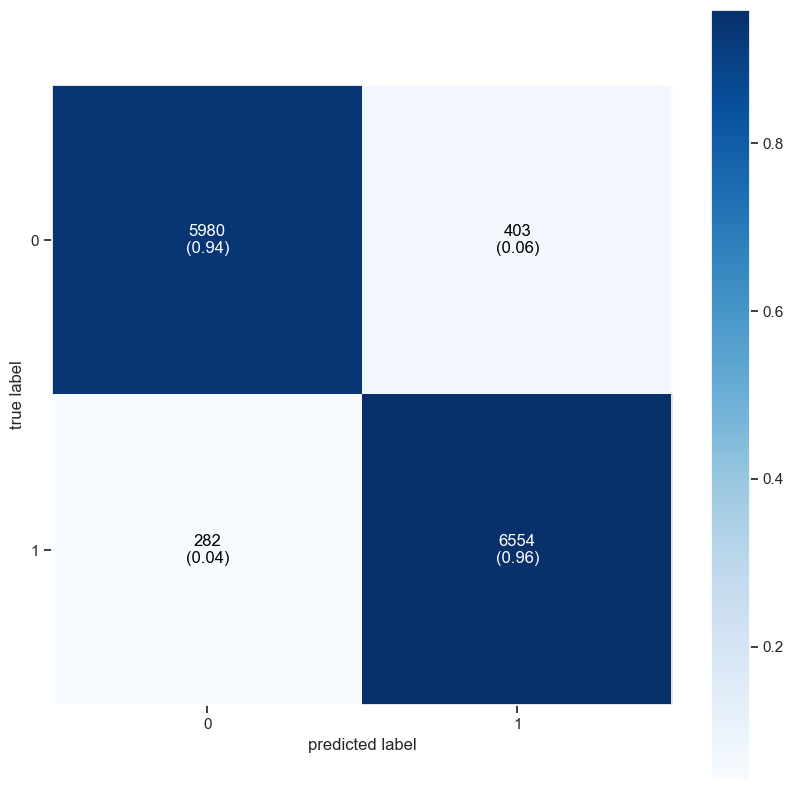

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Random Forest Algorithm

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=100)

In [70]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.94


In [71]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

        fake       0.95      0.94      0.94      6383
        true       0.94      0.95      0.95      6836

    accuracy                           0.94     13219
   macro avg       0.94      0.94      0.94     13219
weighted avg       0.94      0.94      0.94     13219







confusion matrix


[[5972  411]
 [ 319 6517]]




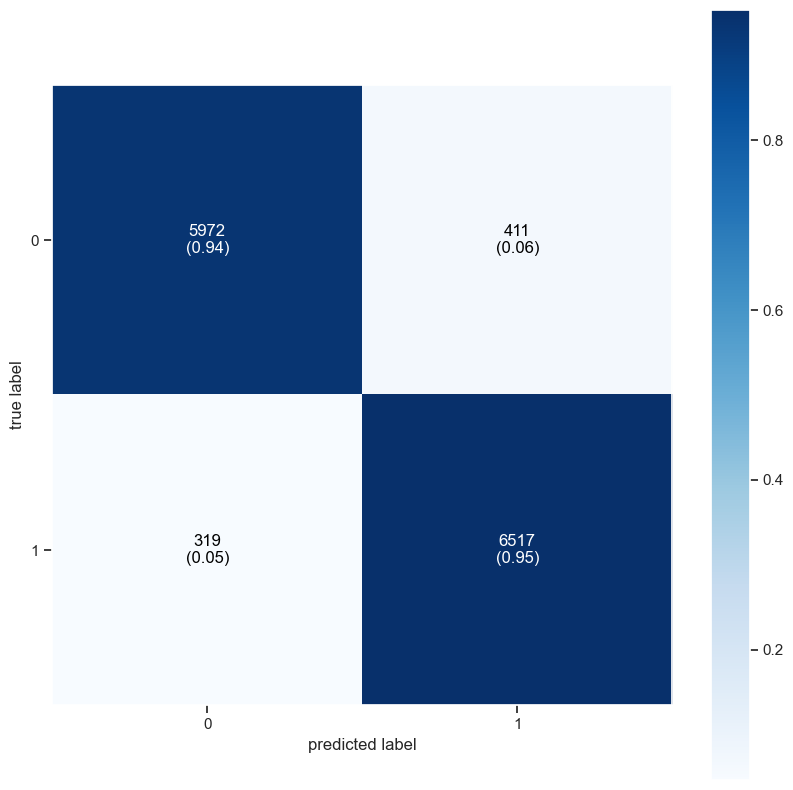

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [73]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [74]:
#!pip install PrettyTable
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])

print(x)
print('\n')




Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.95   |
|    Naive Bayes Algorithm     |   0.84   |
| LogisticRegression Algorithm |   0.95   |
|   Random Forest Algorithm    |   0.94   |
+------------------------------+----------+


